<a href="https://colab.research.google.com/github/JamshedAli18/NASA-Nearest-Earth-Objects-Analysis/blob/main/NASA_%7C_Nearest_Earth_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')

In [9]:
df.shape

(338199, 9)

In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [10]:
df = df.drop(columns=['neo_id', 'name', 'orbiting_body'])

In [11]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [12]:
df.isnull().sum()

,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
relative_velocity,0
miss_distance,0
is_hazardous,0


# Imputing missing Values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Apply the imputer to the relevant columns
df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']] = imputer.fit_transform(df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']])


In [14]:
df.isnull().sum()

,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
relative_velocity,0
miss_distance,0
is_hazardous,0


# Encoding Target variables

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
df['is_hazardous'] = encoder.fit_transform(df[['is_hazardous']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
df[['is_hazardous']]

,is_hazardous
0,0
1,1
2,0
3,0
4,0
...,...
338194,0
338195,0
338196,0
338197,0


# **Visualizing how data is scatterd before scaling**

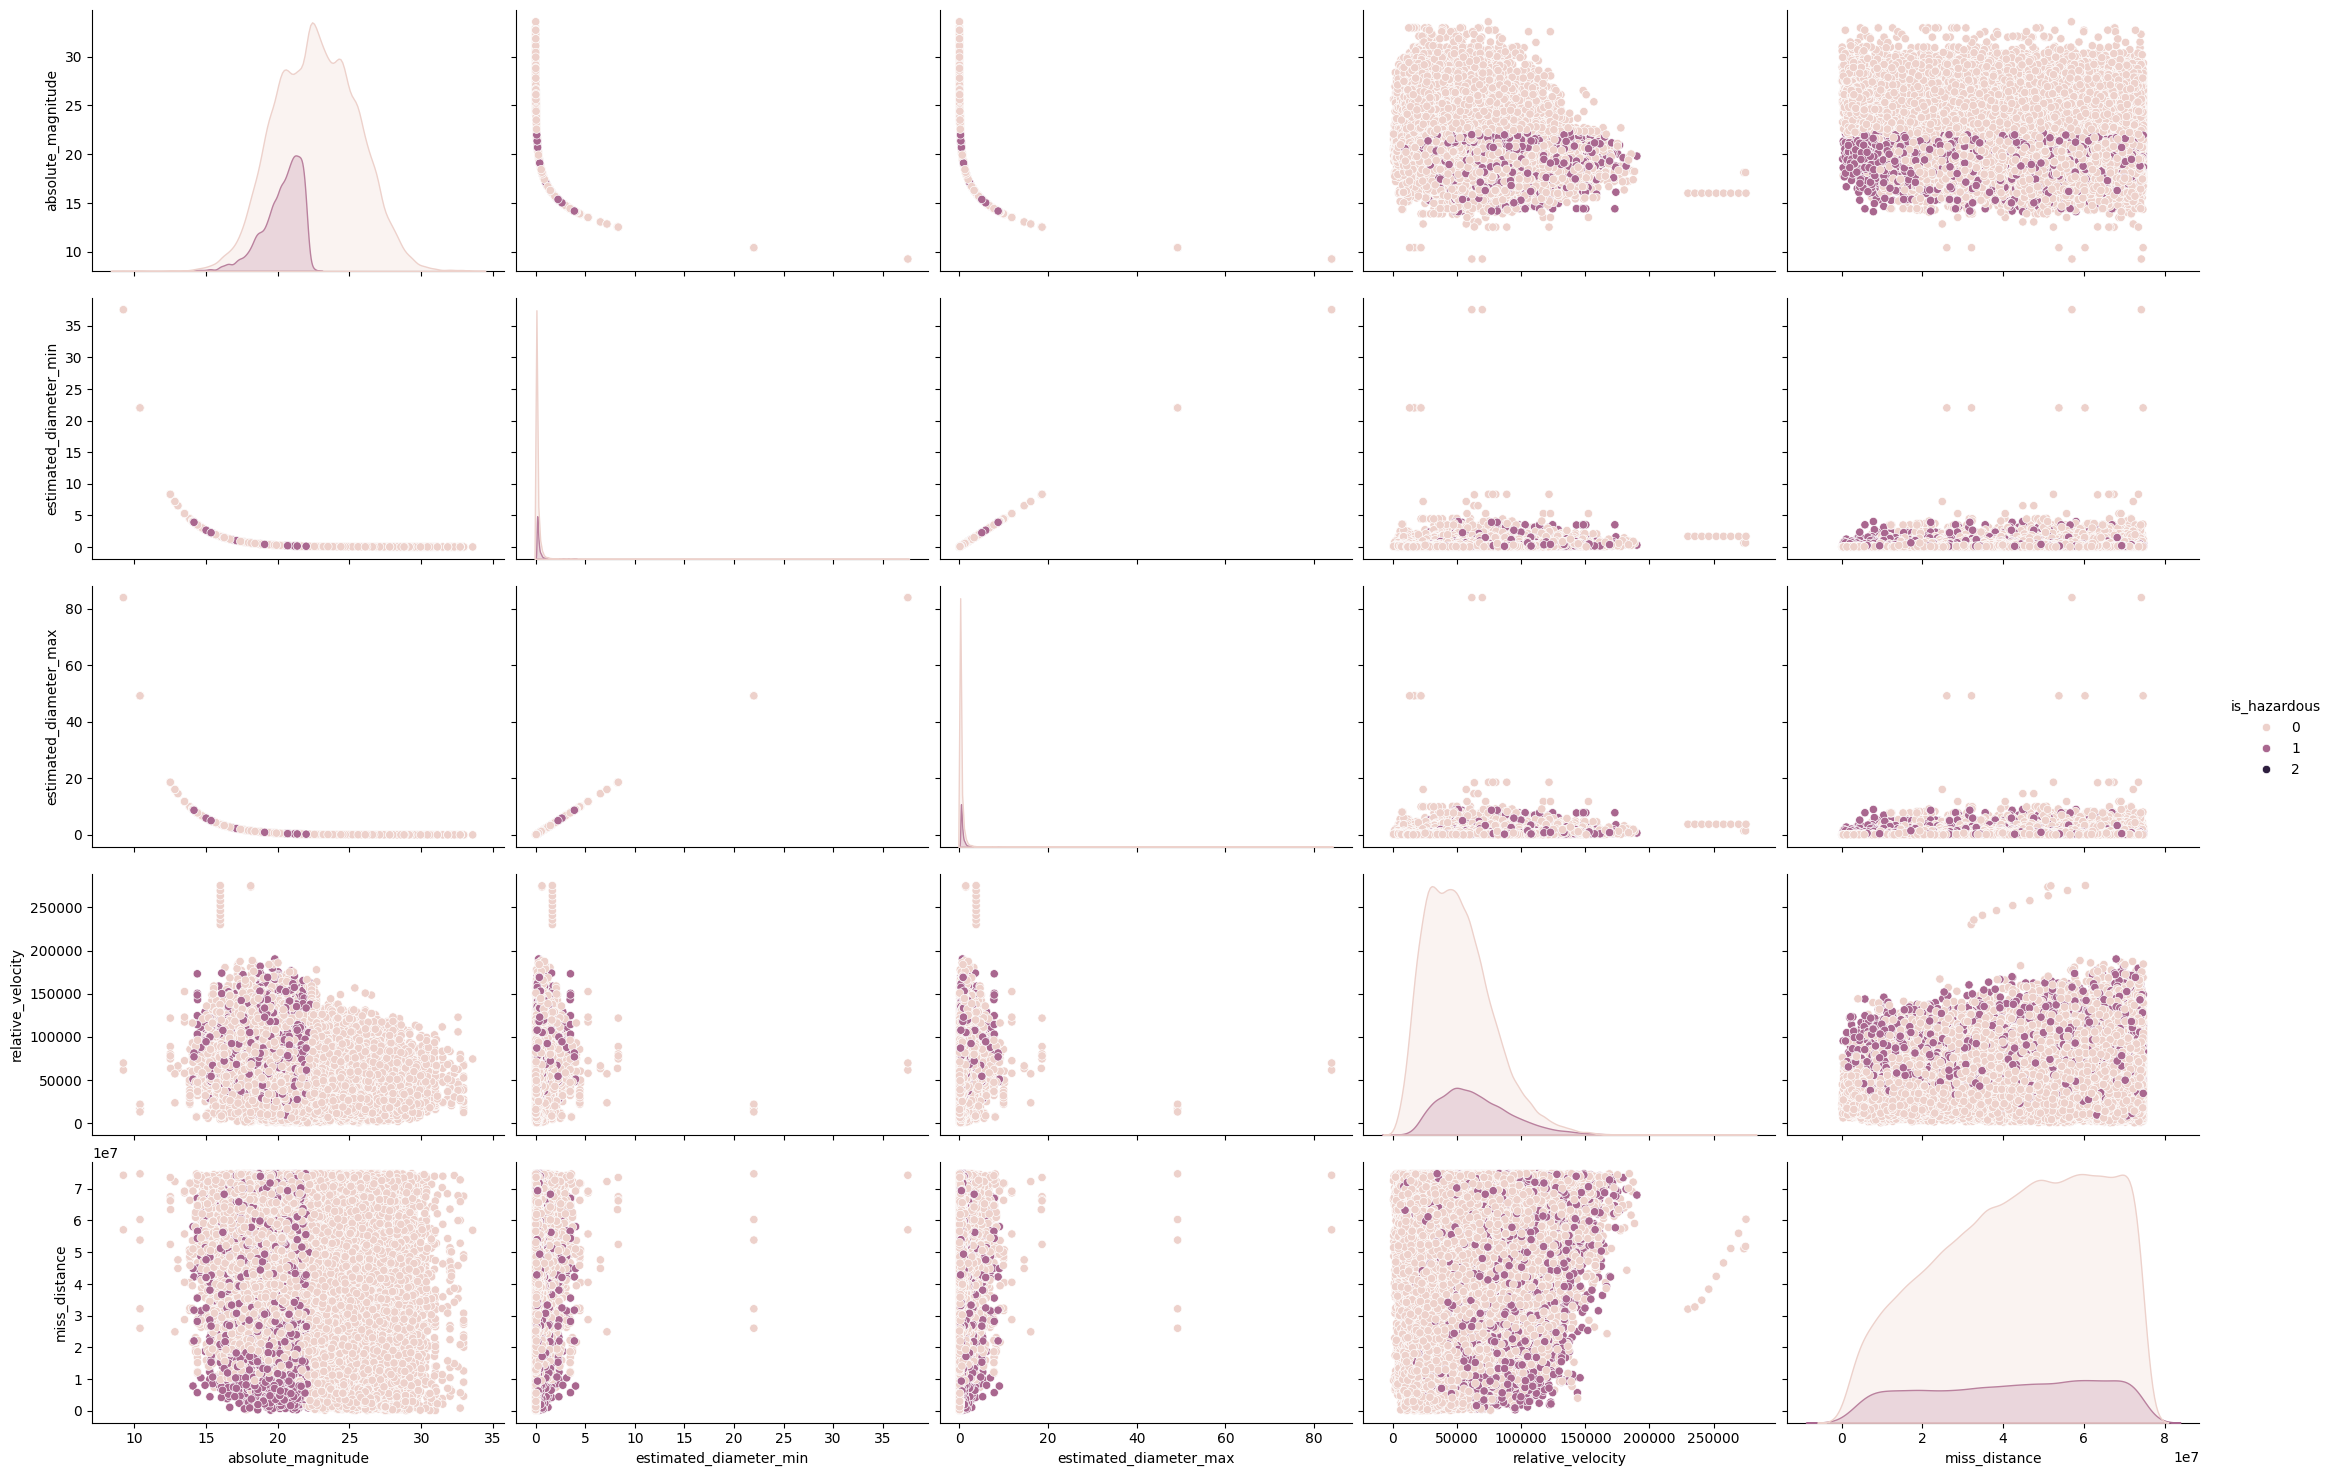

In [ ]:
sns.pairplot(df, hue='is_hazardous',height=3, aspect=1.5)
plt.show()

In [19]:
np.round(df.describe())

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
count,338199.0,338199.0,338199.0,338199.0,338199.0,338199.0
mean,23.0,0.0,0.0,51061.0,41535351.0,0.0
std,3.0,0.0,1.0,26399.0,20773990.0,0.0
min,9.0,0.0,0.0,203.0,6746.0,0.0
25%,21.0,0.0,0.0,30712.0,24945398.0,0.0
50%,23.0,0.0,0.0,47560.0,43326744.0,0.0
75%,25.0,0.0,0.0,66674.0,59339605.0,0.0
max,34.0,38.0,84.0,291781.0,74798651.0,1.0


# **Scaling Data**

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
columns = ["estimated_diameter_min", "estimated_diameter_max", "relative_velocity", "miss_distance"]
minmaxScaler = MinMaxScaler()
df[columns] = minmaxScaler.fit_transform(df[columns])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
Standaradscaler = StandardScaler()

In [24]:
df['absolute_magnitude'] = Standaradscaler.fit_transform(df[['absolute_magnitude']])

In [25]:
import numpy as np
np.round(df.describe())


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
count,338199.0,338199.0,338199.0,338199.0,338199.0,338199.0
mean,0.0,0.0,0.0,0.0,1.0,0.0
std,1.0,0.0,0.0,0.0,0.0,0.0
min,-5.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,0.0,0.0,0.0,0.0,0.0
50%,-0.0,0.0,0.0,0.0,1.0,0.0
75%,1.0,0.0,0.0,0.0,1.0,0.0
max,4.0,1.0,1.0,1.0,1.0,1.0


# Visualing data after Scaling

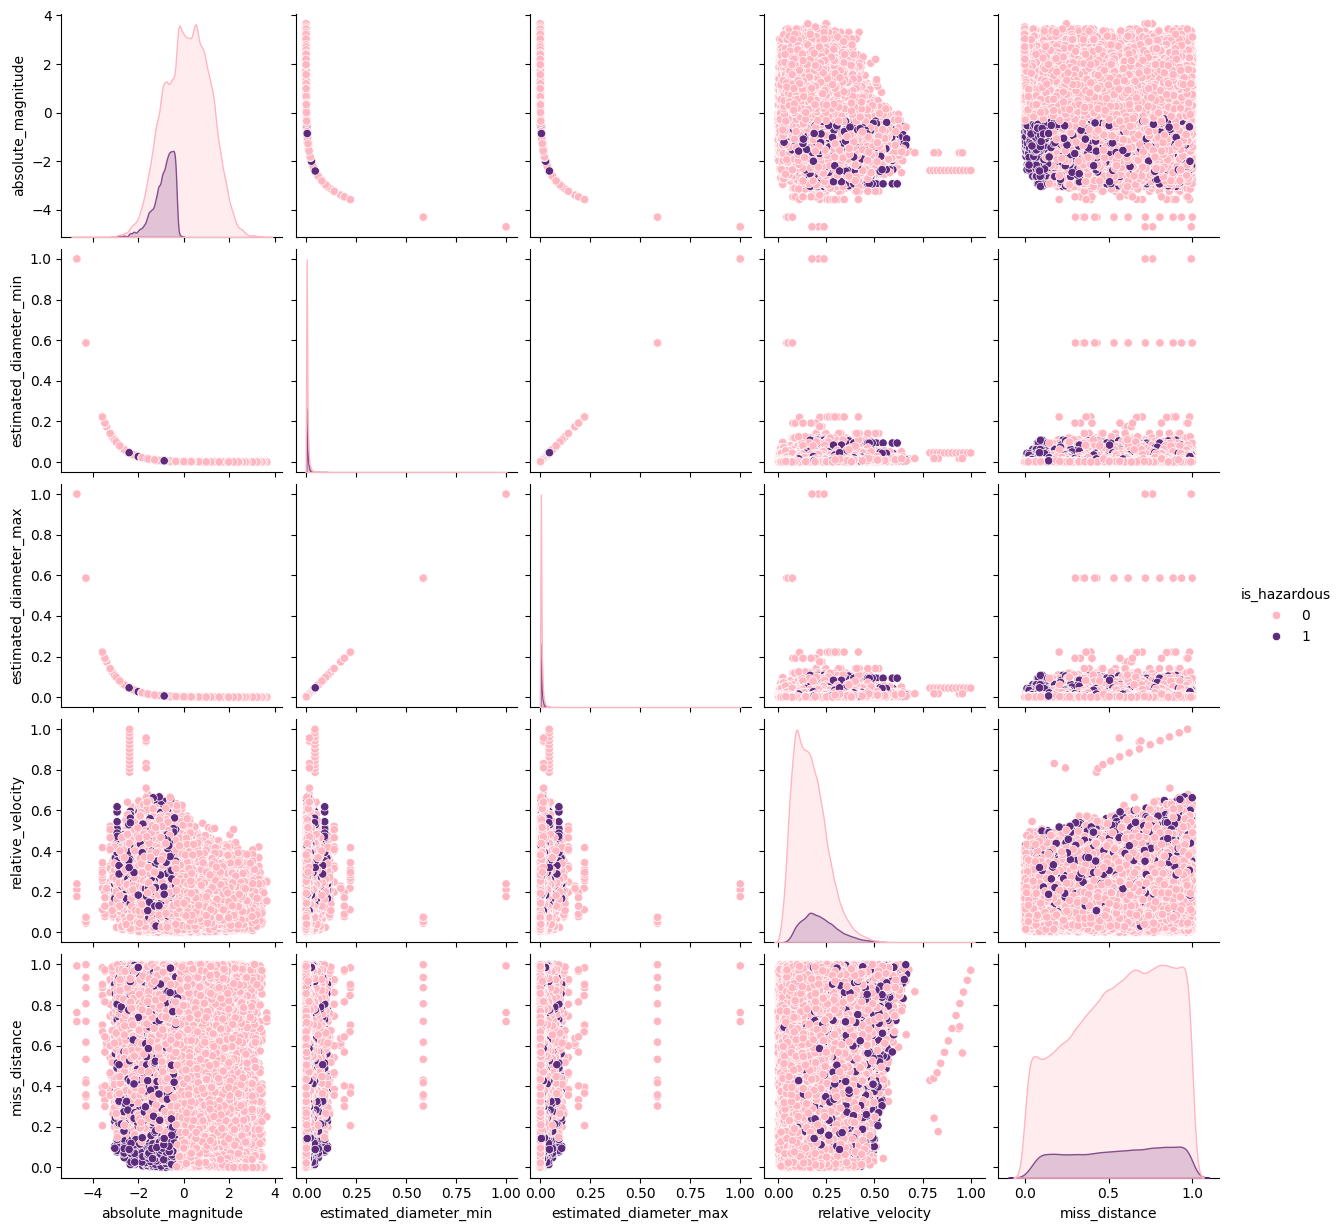

In [ ]:
custom_palette = sns.color_palette(["#FFB6C1", "#5E2A7B"])
sns.pairplot(df, hue='is_hazardous',palette=custom_palette)
plt.show()

# Spliting Data

In [26]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting RandomForestClassifier model

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)

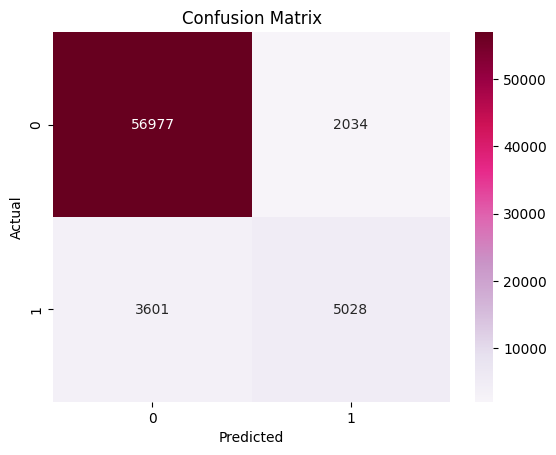

In [32]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9166913069189828
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59011
           1       0.71      0.58      0.64      8629

    accuracy                           0.92     67640
   macro avg       0.83      0.77      0.80     67640
weighted avg       0.91      0.92      0.91     67640



# **ROC Curve (Receiver Operating Characteristic Curve)**

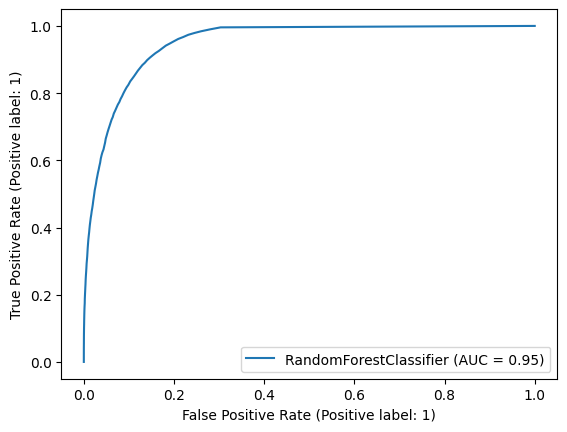

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()


In [ ]:
df.coloumns

# **Precision-Recall Curve**

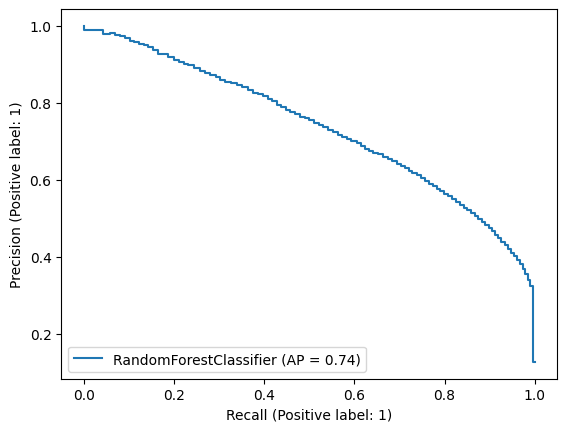

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

# Plot precision-recall curve
PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test)
plt.show()


In [36]:
df.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance',
       'is_hazardous'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338199 non-null  float64
 1   estimated_diameter_min  338199 non-null  float64
 2   estimated_diameter_max  338199 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 15.5 MB


In [38]:
df['absolute_magnitude'] = pd.to_numeric(df['absolute_magnitude'], downcast='float')
df['estimated_diameter_min'] = pd.to_numeric(df['estimated_diameter_min'], downcast='float')
df['estimated_diameter_max'] = pd.to_numeric(df['estimated_diameter_max'], downcast='float')
df['relative_velocity'] = pd.to_numeric(df['relative_velocity'], downcast='float')
df['miss_distance'] = pd.to_numeric(df['miss_distance'], downcast='float')

# Downcast int columns to int32
df['is_hazardous'] = pd.to_numeric(df['is_hazardous'], downcast='integer')

# Check the new data types and memory usage
print(df.dtypes)
print(df.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

absolute_magnitude        float32
estimated_diameter_min    float32
estimated_diameter_max    float32
relative_velocity         float32
miss_distance             float32
is_hazardous                 int8
dtype: object
6.773287773132324 MB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338199 non-null  float32
 1   estimated_diameter_min  338199 non-null  float32
 2   estimated_diameter_max  338199 non-null  float32
 3   relative_velocity       338199 non-null  float32
 4   miss_distance           338199 non-null  float32
 5   is_hazardous            338199 non-null  int8   
dtypes: float32(5), int8(1)
memory usage: 6.8 MB


In [40]:
df.to_csv('Nearest Earth Objects.csv',index=False)